<a href="https://colab.research.google.com/github/OkhlopkovIK/SystremModeling/blob/main/MS_task1_mathmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equasions

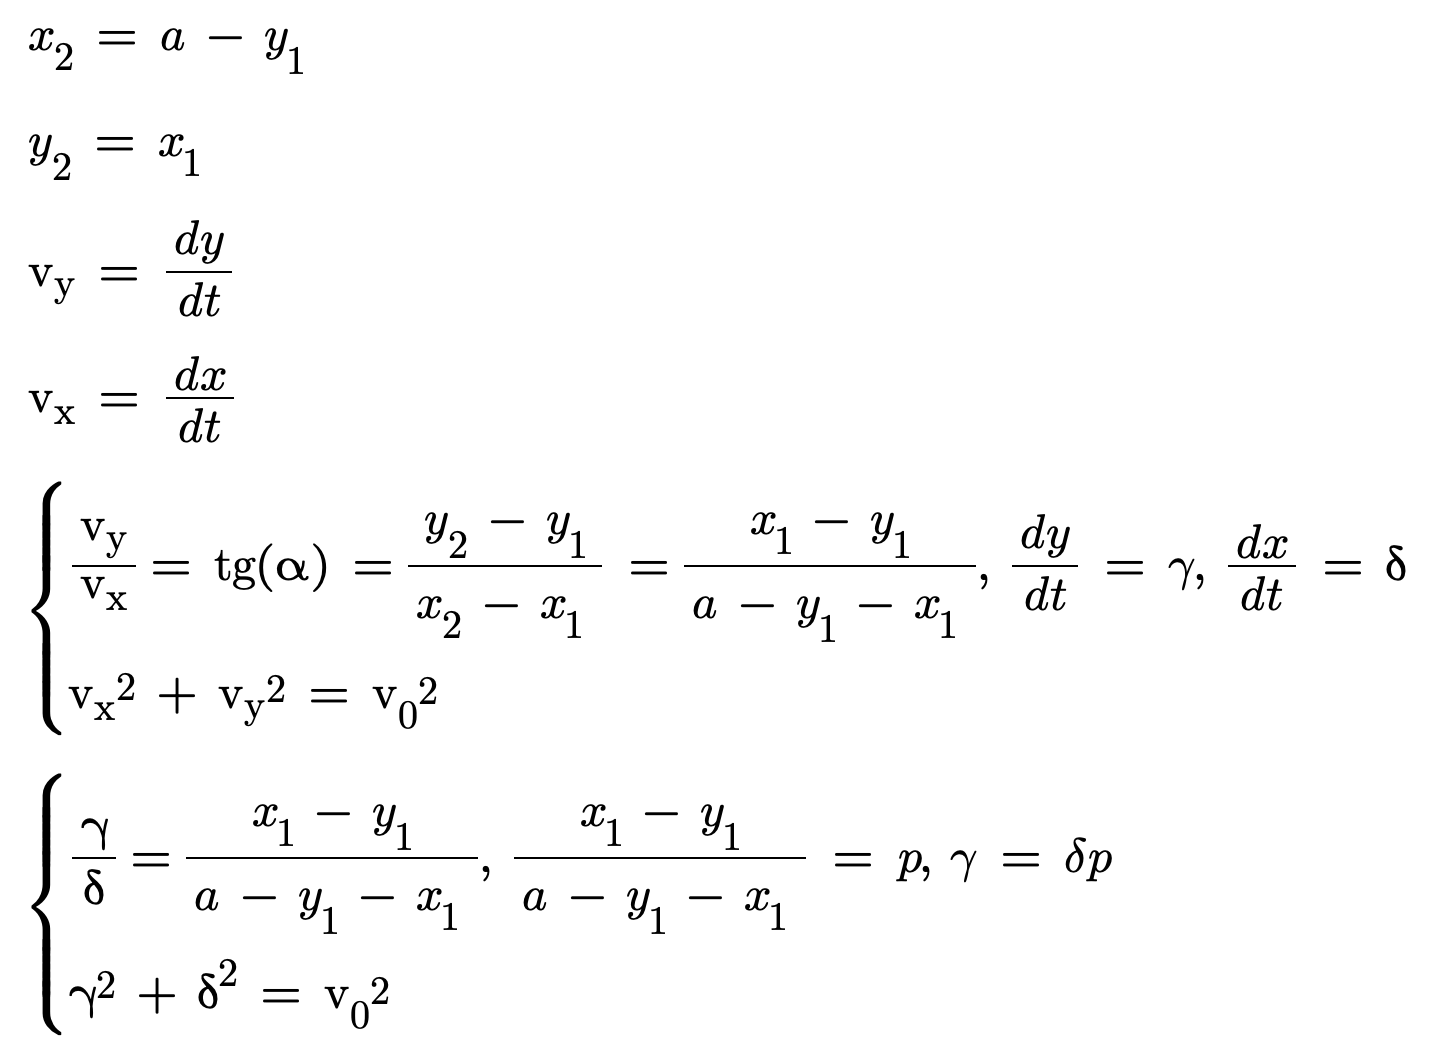

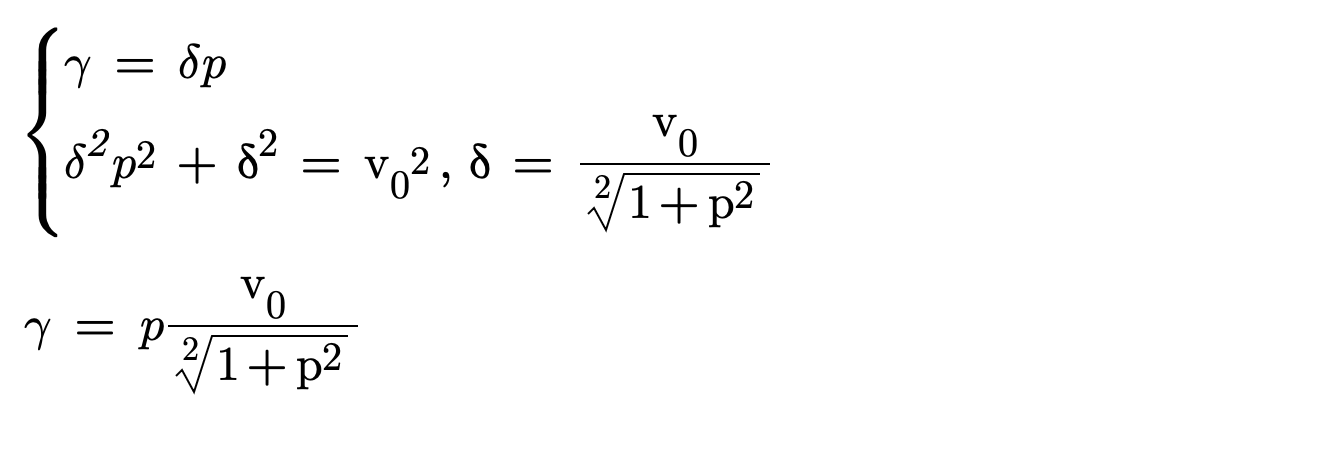

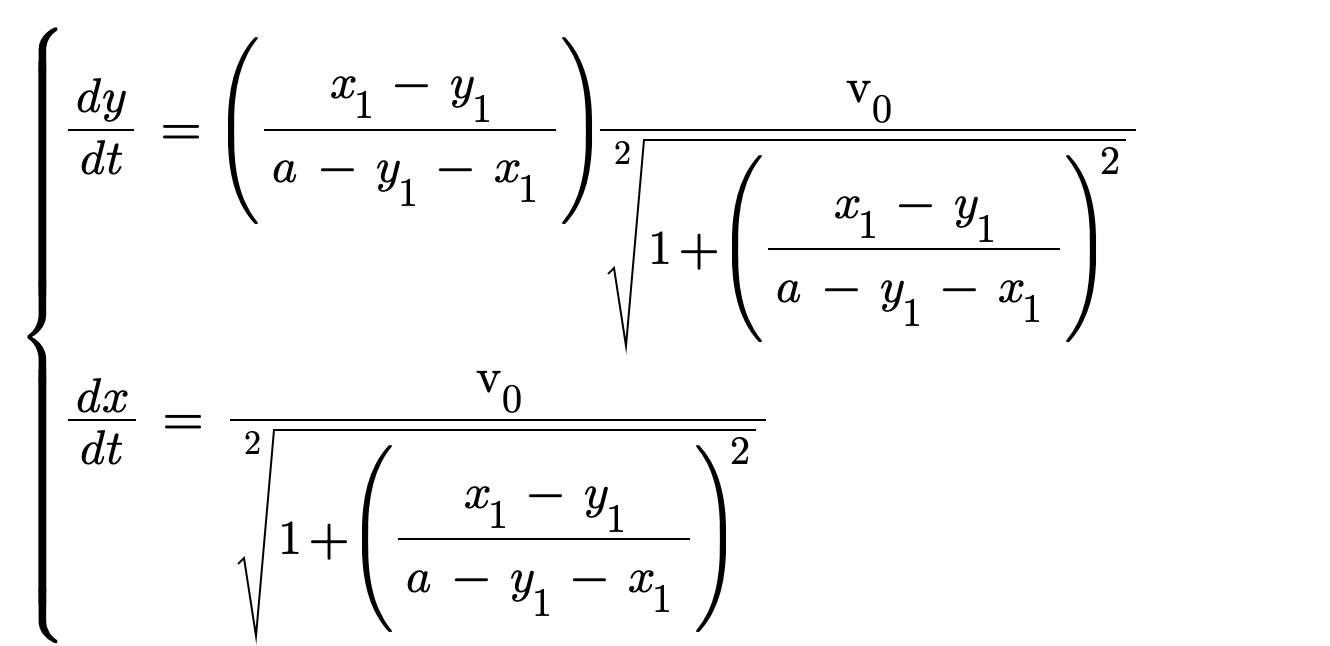

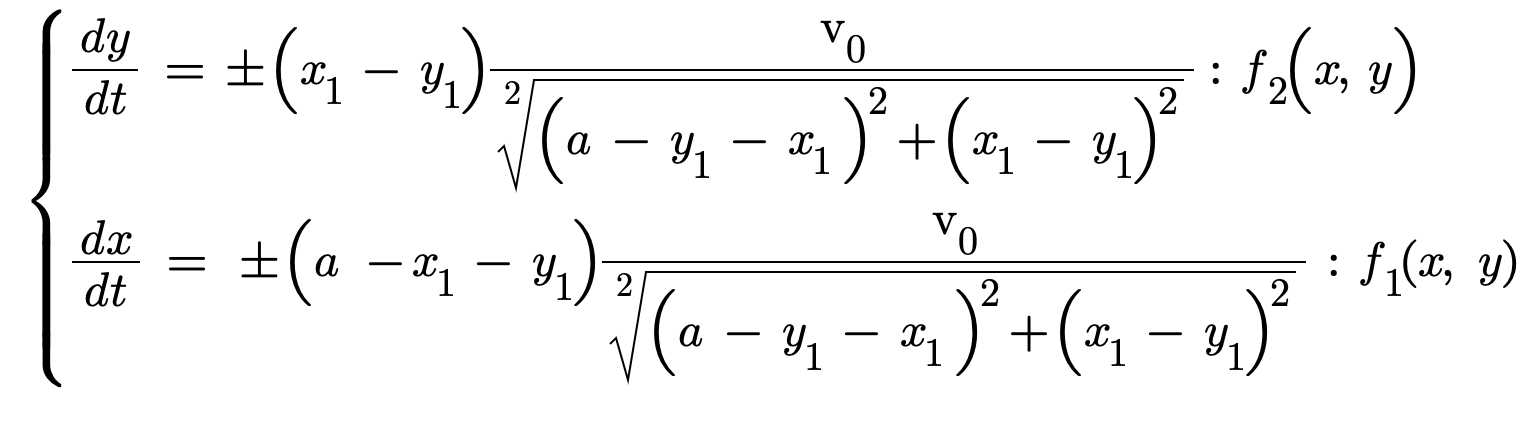

# Runge-Kutta methods

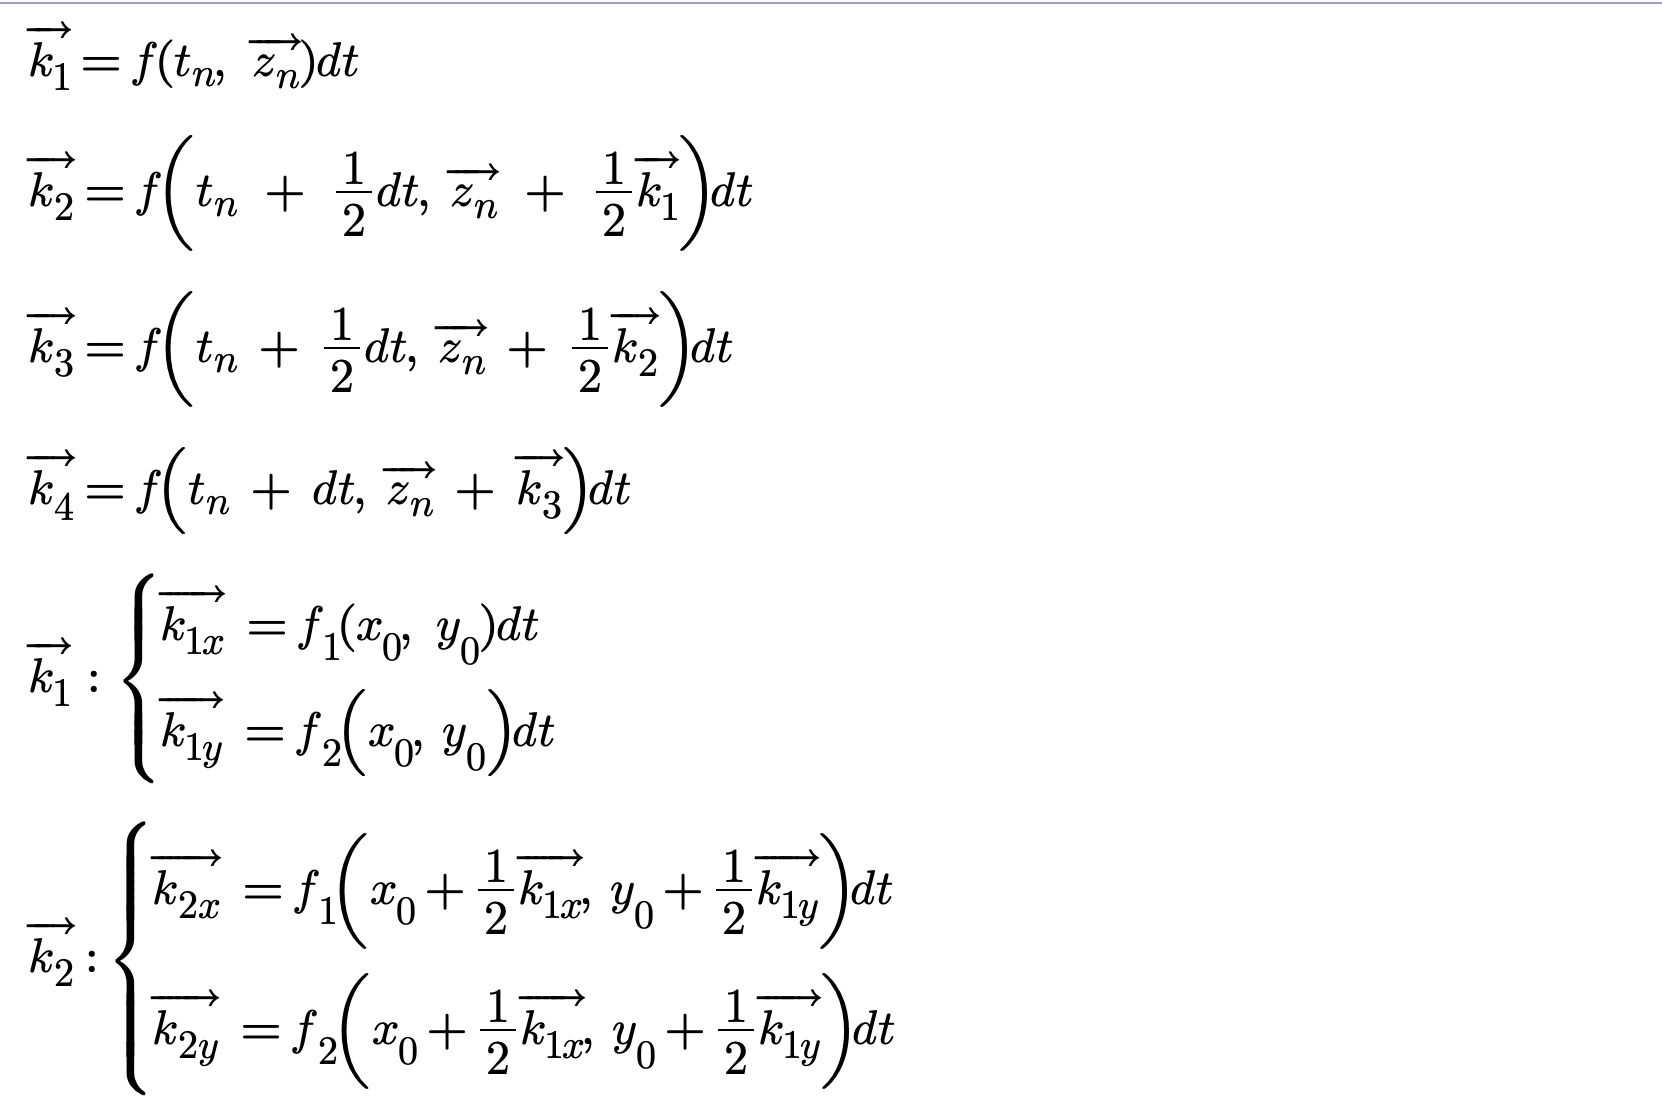

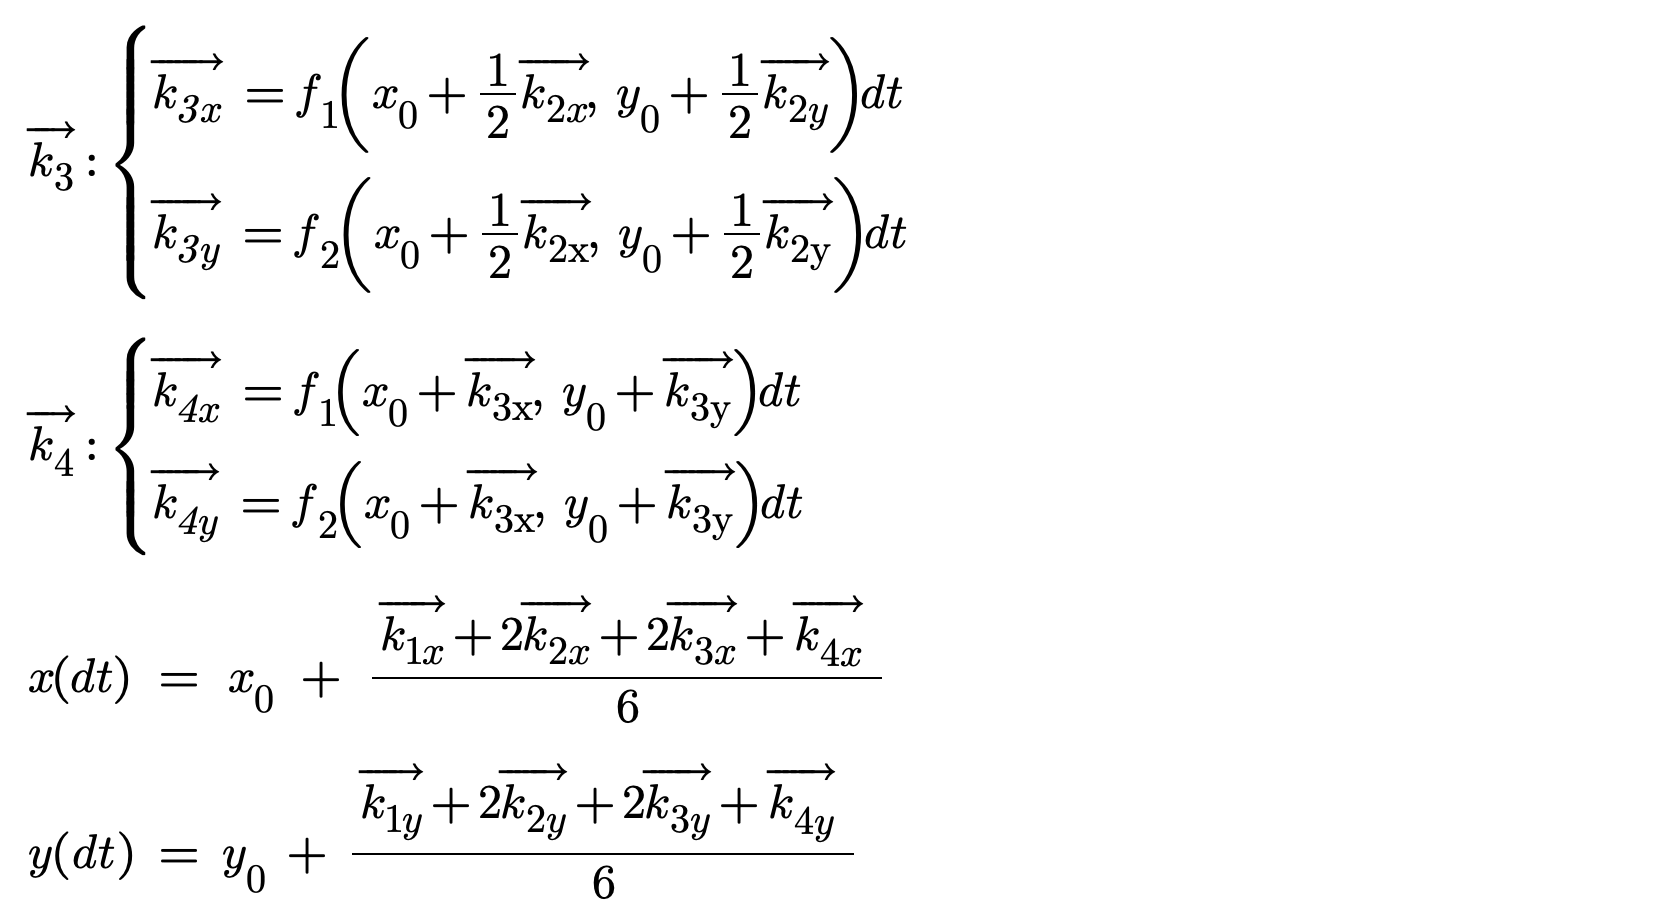

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Constants

In [ ]:
dt: float = 0.0001 # time period
a: float = 2.0 # side
v0: float = 102.0 # velocity
iterations: int = 200 # int(a / dt)
b1_initial_position: tuple[float, float] = (0.0, 0.0)
b2_initial_position: tuple[float, float] = (a, 0.0)
b3_initial_position: tuple[float, float] = (a, a)
b4_initial_position: tuple[float, float] = (0.0, a)

# Coordinate formulae

In [ ]:
def f1(x: float, y: float) -> float:
  return (a - x - y) * (v0 / (math.sqrt((a - x - y) ** 2 + (x - y) ** 2)))

def f2(x: float, y: float) -> float:
  return (x - y) * (v0 / (math.sqrt((a - x - y) ** 2 + (x - y) ** 2)))

def get_ks(x: float, y: float) -> tuple[list[float], list[float]]:
  # print("i m in kx")
  kx: list = []
  ky: list = []
  kx.append(f1(x, y) * dt)
  ky.append(f2(x, y) * dt)
  # print("done k1")
  kx.append(f1(x + 0.5 * kx[0], y + 0.5 * ky[0]))
  ky.append(f2(x + 0.5 * kx[0], y + 0.5 * ky[0]))
  # print("done k2")
  kx.append(f1(x + 0.5 * kx[1], y + 0.5 * ky[1]))
  ky.append(f2(x + 0.5 * kx[1], y + 0.5 * ky[1]))
  # print("done k3")
  kx.append(f1(x + kx[2], y + ky[2]))
  ky.append(f2(x + kx[2], y + ky[2]))
  # print("done k4")

  return kx, ky

def get_new_position(x_p: float, y_p: float) -> tuple[float, float]:
  # print("i m in getNewPosition")
  kxky: tuple[list[float], list[float]] = get_ks(x_p, y_p)
  kx: list[float] = kxky[0]
  ky: list[float] = kxky[1]

  x_dt = x_p + (kx[0] + 2 * kx[1] + 2 * kx[2] + kx[3]) / 6
  y_dt = y_p + (ky[0] + 2 * ky[1] + 2 * ky[2] + ky[3]) / 6

  return x_dt, y_dt

# Tracing function

In [ ]:
def trace(initial_position: tuple[float, float]) -> list[tuple[float, float]]:
  positions: list[tuple[float, float]] = [initial_position]
  for iteration in range(iterations):
    current_position: tuple[float, float] = positions[-1]
    next_position: tuple[float, float] = get_new_position(current_position[0], current_position[1])
    positions.append(next_position)

  return positions

# Tracing the beatles

In [ ]:
# initializing beatles' positions sequences
b1_positions: list[tuple[float, float]] = trace(b1_initial_position)
b2_positions: list[tuple[float, float]] = trace(b2_initial_position)
b3_positions: list[tuple[float, float]] = trace(b3_initial_position)
b4_positions: list[tuple[float, float]] = trace(b4_initial_position)

# Plotting the traces

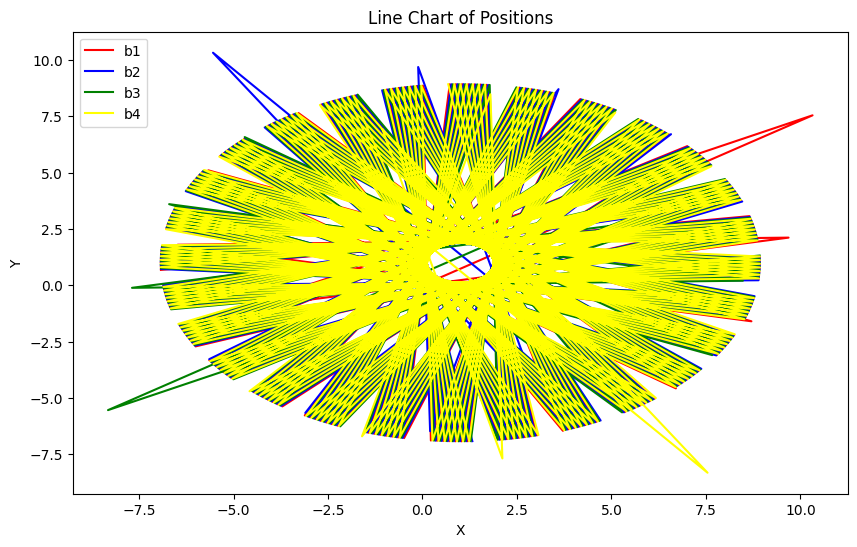

In [ ]:

plt.figure(figsize=(10, 6))

# plot each list with a different color and label
plt.plot(*zip(*b1_positions), color='red', label='b1')
plt.plot(*zip(*b2_positions), color='blue', label='b2')
plt.plot(*zip(*b3_positions), color='green', label='b3')
plt.plot(*zip(*b4_positions), color='yellow', label='b4')

# add title and labels
plt.title('Line Chart of Positions')
plt.xlabel('X')
plt.ylabel('Y')

# add legend
plt.legend()

# show the plot
plt.show()
